In [45]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [46]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [47]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [48]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [49]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        noise = torch.randn(x.size()).to(device) # Add Gaussian noise to the inputs
        x = x + noise
        return self.main(x)

In [50]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [51]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [52]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [53]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [54]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [55]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [56]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [57]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:18,  6.50it/s]                         


Epoch 1 of 100
Generator loss: 2.47730742, Discriminator loss: 0.84844713


118it [00:15,  7.39it/s]                         


Epoch 2 of 100
Generator loss: 3.69713652, Discriminator loss: 0.94348872


118it [00:15,  7.73it/s]                         


Epoch 3 of 100
Generator loss: 8.38766445, Discriminator loss: 0.10004393


118it [00:15,  7.73it/s]                         


Epoch 4 of 100
Generator loss: 4.49232524, Discriminator loss: 0.72023778


118it [00:14,  7.89it/s]                         


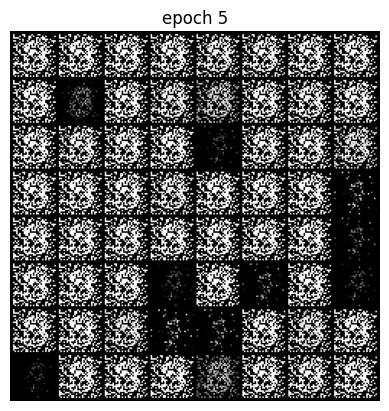

Epoch 5 of 100
Generator loss: 8.77888346, Discriminator loss: 0.27311449


118it [00:15,  7.56it/s]                         


Epoch 6 of 100
Generator loss: 7.55451653, Discriminator loss: 0.43055151


118it [00:16,  7.09it/s]                         


Epoch 7 of 100
Generator loss: 3.77312024, Discriminator loss: 0.67082322


118it [00:15,  7.67it/s]                         


Epoch 8 of 100
Generator loss: 4.59076294, Discriminator loss: 0.60936386


118it [00:16,  7.37it/s]                         


Epoch 9 of 100
Generator loss: 2.47400361, Discriminator loss: 0.97974884


118it [00:16,  7.35it/s]                         


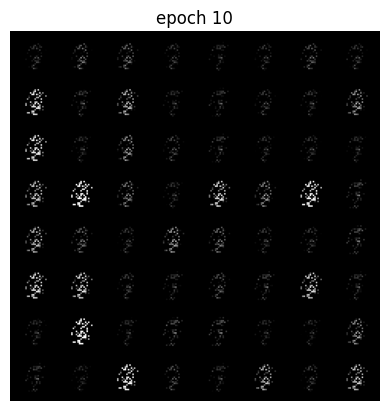

Epoch 10 of 100
Generator loss: 2.75099581, Discriminator loss: 0.90876138


118it [00:15,  7.69it/s]                         


Epoch 11 of 100
Generator loss: 1.27574592, Discriminator loss: 1.21482821


118it [00:15,  7.60it/s]                         


Epoch 12 of 100
Generator loss: 0.96284768, Discriminator loss: 1.22393096


118it [00:16,  7.35it/s]                         


Epoch 13 of 100
Generator loss: 0.87469811, Discriminator loss: 1.31687787


118it [00:15,  7.63it/s]                         


Epoch 14 of 100
Generator loss: 0.71650259, Discriminator loss: 1.38401486


118it [00:15,  7.77it/s]                         


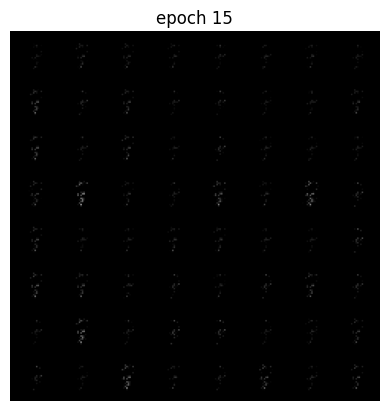

Epoch 15 of 100
Generator loss: 0.72916757, Discriminator loss: 1.35678835


118it [00:15,  7.74it/s]                         


Epoch 16 of 100
Generator loss: 0.78936322, Discriminator loss: 1.32340986


118it [00:15,  7.81it/s]                         


Epoch 17 of 100
Generator loss: 0.87268902, Discriminator loss: 1.27411877


118it [00:15,  7.46it/s]                         


Epoch 18 of 100
Generator loss: 1.14635282, Discriminator loss: 1.14984942


118it [00:15,  7.42it/s]                         


Epoch 19 of 100
Generator loss: 1.35297765, Discriminator loss: 1.03235719


118it [00:15,  7.51it/s]                         


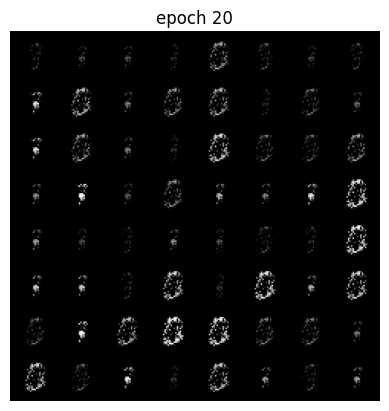

Epoch 20 of 100
Generator loss: 1.33383501, Discriminator loss: 1.01226016


118it [00:15,  7.69it/s]                         


Epoch 21 of 100
Generator loss: 1.52473215, Discriminator loss: 0.88530453


118it [00:15,  7.61it/s]                         


Epoch 22 of 100
Generator loss: 1.69382157, Discriminator loss: 0.78980187


118it [00:15,  7.62it/s]                         


Epoch 23 of 100
Generator loss: 1.58590119, Discriminator loss: 0.97115840


118it [00:15,  7.70it/s]                         


Epoch 24 of 100
Generator loss: 1.62406455, Discriminator loss: 0.81681608


118it [00:15,  7.61it/s]                         


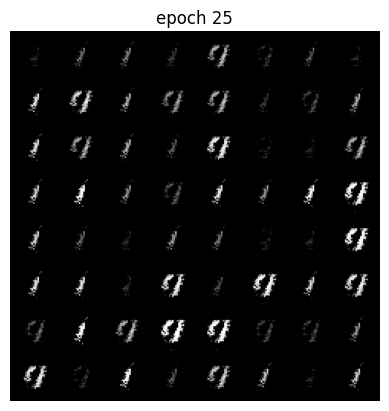

Epoch 25 of 100
Generator loss: 1.83387849, Discriminator loss: 0.78125974


118it [00:15,  7.45it/s]                         


Epoch 26 of 100
Generator loss: 2.02979425, Discriminator loss: 0.64540018


118it [00:16,  7.07it/s]                         


Epoch 27 of 100
Generator loss: 2.36300952, Discriminator loss: 0.68208820


118it [00:15,  7.45it/s]                         


Epoch 28 of 100
Generator loss: 1.76310801, Discriminator loss: 0.83878945


118it [00:15,  7.49it/s]                         


Epoch 29 of 100
Generator loss: 1.85214778, Discriminator loss: 0.77521676


118it [00:15,  7.52it/s]                         


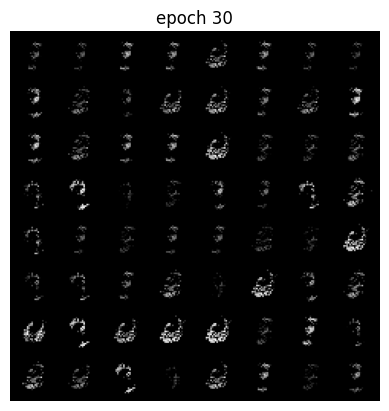

Epoch 30 of 100
Generator loss: 1.93297781, Discriminator loss: 0.70607656


118it [00:15,  7.56it/s]                         


Epoch 31 of 100
Generator loss: 1.95018674, Discriminator loss: 0.74944674


118it [00:15,  7.51it/s]                         


Epoch 32 of 100
Generator loss: 1.69670269, Discriminator loss: 0.83799088


118it [00:15,  7.60it/s]                         


Epoch 33 of 100
Generator loss: 1.70635228, Discriminator loss: 0.76142218


118it [00:16,  7.22it/s]                         


Epoch 34 of 100
Generator loss: 1.70362376, Discriminator loss: 0.83732517


118it [00:16,  7.24it/s]                         


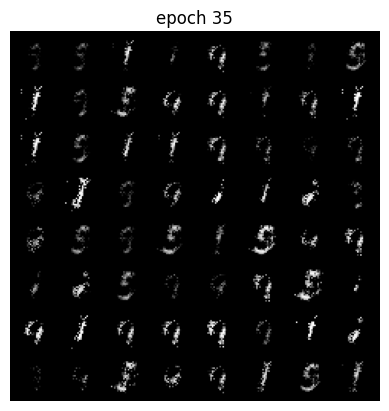

Epoch 35 of 100
Generator loss: 1.83105219, Discriminator loss: 0.74593171


118it [00:15,  7.43it/s]                         


Epoch 36 of 100
Generator loss: 1.99012233, Discriminator loss: 0.69748612


118it [00:15,  7.55it/s]                         


Epoch 37 of 100
Generator loss: 1.95018859, Discriminator loss: 0.73545837


118it [00:15,  7.67it/s]                         


Epoch 38 of 100
Generator loss: 1.84400754, Discriminator loss: 0.72548379


118it [00:15,  7.62it/s]                         


Epoch 39 of 100
Generator loss: 1.83175792, Discriminator loss: 0.79183915


118it [00:15,  7.61it/s]                         


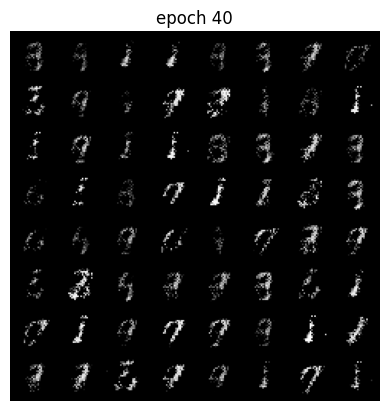

Epoch 40 of 100
Generator loss: 1.85387031, Discriminator loss: 0.77340058


118it [00:15,  7.57it/s]                         


Epoch 41 of 100
Generator loss: 1.73937800, Discriminator loss: 0.83975858


118it [00:15,  7.56it/s]                         


Epoch 42 of 100
Generator loss: 1.56378245, Discriminator loss: 0.89377548


118it [00:15,  7.45it/s]                         


Epoch 43 of 100
Generator loss: 1.54555670, Discriminator loss: 0.90951875


118it [00:15,  7.40it/s]                         


Epoch 44 of 100
Generator loss: 1.50433801, Discriminator loss: 0.95551477


118it [00:15,  7.59it/s]                         


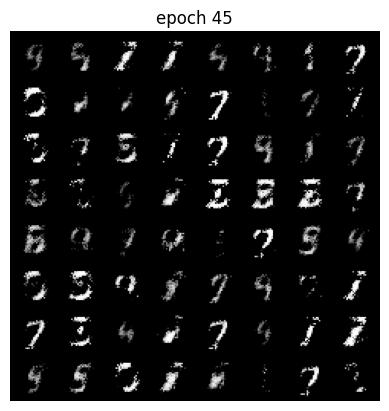

Epoch 45 of 100
Generator loss: 1.41471887, Discriminator loss: 0.95982907


118it [00:15,  7.64it/s]                         


Epoch 46 of 100
Generator loss: 1.48882019, Discriminator loss: 0.90628643


118it [00:15,  7.57it/s]                         


Epoch 47 of 100
Generator loss: 1.50373649, Discriminator loss: 0.90139368


118it [00:15,  7.60it/s]                         


Epoch 48 of 100
Generator loss: 1.49832537, Discriminator loss: 0.94524534


118it [00:15,  7.57it/s]                         


Epoch 49 of 100
Generator loss: 1.42190969, Discriminator loss: 0.95527699


118it [00:15,  7.62it/s]                         


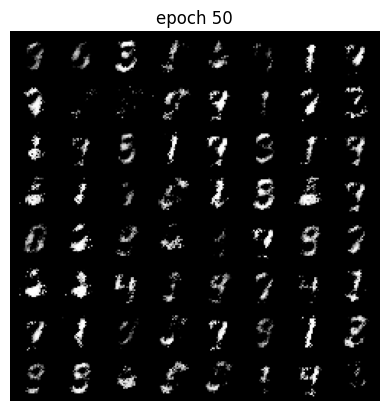

Epoch 50 of 100
Generator loss: 1.44673603, Discriminator loss: 0.93430628


118it [00:15,  7.43it/s]                         


Epoch 51 of 100
Generator loss: 1.46076332, Discriminator loss: 0.92839375


118it [00:16,  7.36it/s]                         


Epoch 52 of 100
Generator loss: 1.30975998, Discriminator loss: 1.02937393


118it [00:16,  7.25it/s]                         


Epoch 53 of 100
Generator loss: 1.37409118, Discriminator loss: 1.00947844


118it [00:15,  7.45it/s]                         


Epoch 54 of 100
Generator loss: 1.35231235, Discriminator loss: 1.04047452


118it [00:15,  7.38it/s]                         


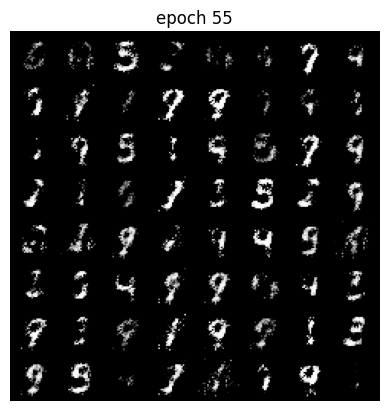

Epoch 55 of 100
Generator loss: 1.45085412, Discriminator loss: 0.98206938


118it [00:16,  7.33it/s]                         


Epoch 56 of 100
Generator loss: 1.36315668, Discriminator loss: 1.02251360


118it [00:16,  7.29it/s]                         


Epoch 57 of 100
Generator loss: 1.31283829, Discriminator loss: 1.01111743


118it [00:16,  7.25it/s]                         


Epoch 58 of 100
Generator loss: 1.37277765, Discriminator loss: 1.00829822


118it [00:16,  7.19it/s]                         


Epoch 59 of 100
Generator loss: 1.33198136, Discriminator loss: 1.04405008


118it [00:16,  7.28it/s]                         


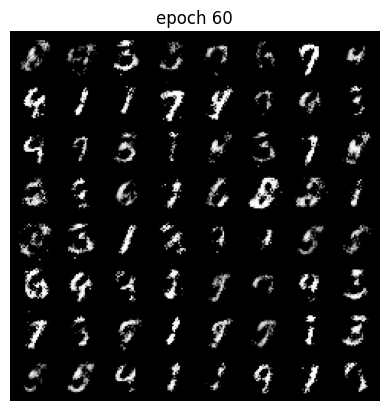

Epoch 60 of 100
Generator loss: 1.27699630, Discriminator loss: 1.03987073


118it [00:15,  7.45it/s]                         


Epoch 61 of 100
Generator loss: 1.39694967, Discriminator loss: 0.96201131


118it [00:16,  7.24it/s]                         


Epoch 62 of 100
Generator loss: 1.45652205, Discriminator loss: 0.97685000


118it [00:15,  7.38it/s]                         


Epoch 63 of 100
Generator loss: 1.33591486, Discriminator loss: 1.04315229


118it [00:16,  7.26it/s]                         


Epoch 64 of 100
Generator loss: 1.38991139, Discriminator loss: 0.98665914


118it [00:16,  7.32it/s]                         


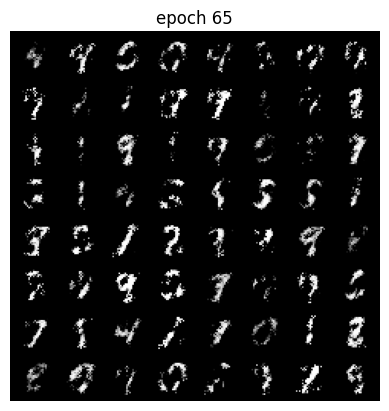

Epoch 65 of 100
Generator loss: 1.39215461, Discriminator loss: 1.01510097


118it [00:16,  7.04it/s]                         


Epoch 66 of 100
Generator loss: 1.44373550, Discriminator loss: 0.95018900


118it [00:16,  7.28it/s]                         


Epoch 67 of 100
Generator loss: 1.30873343, Discriminator loss: 1.02352304


118it [00:16,  7.21it/s]                         


Epoch 68 of 100
Generator loss: 1.40459738, Discriminator loss: 0.98088511


118it [00:16,  7.35it/s]                         


Epoch 69 of 100
Generator loss: 1.30869482, Discriminator loss: 1.02032990


118it [00:15,  7.40it/s]                         


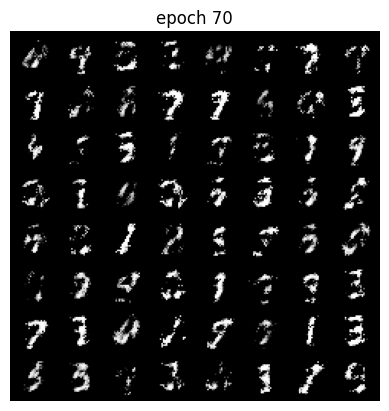

Epoch 70 of 100
Generator loss: 1.32551407, Discriminator loss: 1.04478624


118it [00:15,  7.42it/s]                         


Epoch 71 of 100
Generator loss: 1.23980186, Discriminator loss: 1.07500488


118it [00:16,  7.19it/s]                         


Epoch 72 of 100
Generator loss: 1.32252028, Discriminator loss: 1.05871810


118it [00:16,  7.13it/s]                         


Epoch 73 of 100
Generator loss: 1.31455282, Discriminator loss: 1.06705230


118it [00:16,  7.31it/s]                         


Epoch 74 of 100
Generator loss: 1.30155476, Discriminator loss: 1.04756872


118it [00:15,  7.52it/s]                         


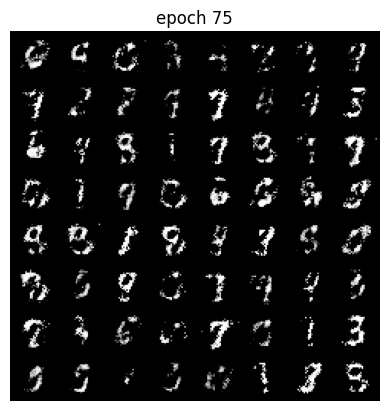

Epoch 75 of 100
Generator loss: 1.24336099, Discriminator loss: 1.07674759


118it [00:15,  7.58it/s]                         


Epoch 76 of 100
Generator loss: 1.28567016, Discriminator loss: 1.05594295


118it [00:15,  7.57it/s]                         


Epoch 77 of 100
Generator loss: 1.29676011, Discriminator loss: 1.06452378


118it [00:15,  7.44it/s]                         


Epoch 78 of 100
Generator loss: 1.23461414, Discriminator loss: 1.09517805


118it [00:16,  7.27it/s]                         


Epoch 79 of 100
Generator loss: 1.24317409, Discriminator loss: 1.09138204


118it [00:16,  7.17it/s]                         


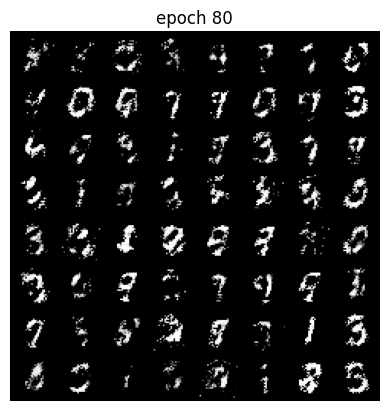

Epoch 80 of 100
Generator loss: 1.20416763, Discriminator loss: 1.12194484


118it [00:16,  7.07it/s]                         


Epoch 81 of 100
Generator loss: 1.18836617, Discriminator loss: 1.10576681


118it [00:16,  7.07it/s]                         


Epoch 82 of 100
Generator loss: 1.22226535, Discriminator loss: 1.10479939


118it [00:16,  7.26it/s]                         


Epoch 83 of 100
Generator loss: 1.19988628, Discriminator loss: 1.11041297


118it [00:16,  7.25it/s]                         


Epoch 84 of 100
Generator loss: 1.17794319, Discriminator loss: 1.12872750


118it [00:16,  7.28it/s]                         


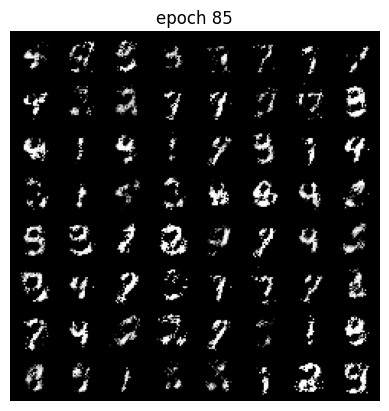

Epoch 85 of 100
Generator loss: 1.14596330, Discriminator loss: 1.12978911


118it [00:16,  7.11it/s]                         


Epoch 86 of 100
Generator loss: 1.18005660, Discriminator loss: 1.11684330


118it [00:16,  7.04it/s]                         


Epoch 87 of 100
Generator loss: 1.17303091, Discriminator loss: 1.10082305


118it [00:16,  6.95it/s]                         


Epoch 88 of 100
Generator loss: 1.24075537, Discriminator loss: 1.07795359


118it [00:16,  7.24it/s]                         


Epoch 89 of 100
Generator loss: 1.16069164, Discriminator loss: 1.13329900


118it [00:16,  7.22it/s]                         


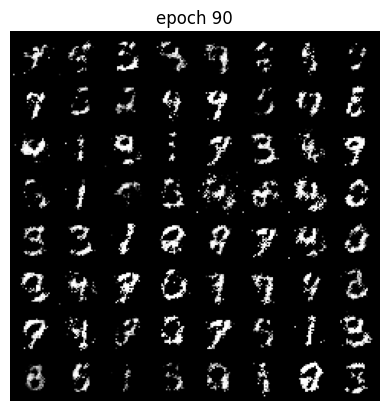

Epoch 90 of 100
Generator loss: 1.22531311, Discriminator loss: 1.08595578


118it [00:16,  7.20it/s]                         


Epoch 91 of 100
Generator loss: 1.16119597, Discriminator loss: 1.11639508


118it [00:16,  7.20it/s]                         


Epoch 92 of 100
Generator loss: 1.13804135, Discriminator loss: 1.13783871


118it [00:16,  7.20it/s]                         


Epoch 93 of 100
Generator loss: 1.07501545, Discriminator loss: 1.16932513


118it [00:17,  6.93it/s]                         


Epoch 94 of 100
Generator loss: 1.05089230, Discriminator loss: 1.18954997


118it [00:17,  6.88it/s]                         


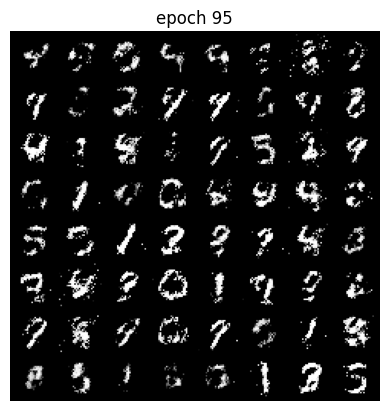

Epoch 95 of 100
Generator loss: 1.07400600, Discriminator loss: 1.16498087


118it [00:16,  7.24it/s]                         


Epoch 96 of 100
Generator loss: 1.10254235, Discriminator loss: 1.16059959


118it [00:16,  7.14it/s]                         


Epoch 97 of 100
Generator loss: 1.05515836, Discriminator loss: 1.19700850


118it [00:16,  7.26it/s]                         


Epoch 98 of 100
Generator loss: 1.11148157, Discriminator loss: 1.16379501


118it [00:16,  7.22it/s]                         


Epoch 99 of 100
Generator loss: 1.03114007, Discriminator loss: 1.20305013


118it [00:16,  7.24it/s]                         


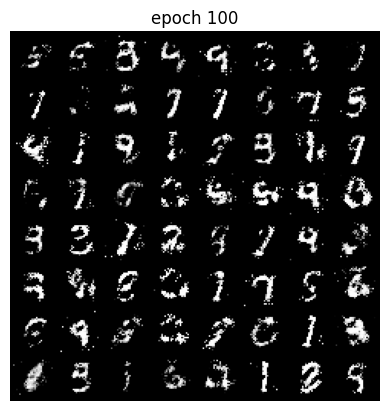

Epoch 100 of 100
Generator loss: 1.04039510, Discriminator loss: 1.20343247


In [58]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    return criterion(output,true_label)

    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########

    return criterion(output,true_label)


    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########

        #Discriminator
        real_img = data[0].to(device)
        real_labels = label_real(real_img.shape[0])

        for _ in range(k):
          optim_d.zero_grad()
          real_output_d = discriminator(real_img)
          real_loss_d = discriminator_loss(real_output_d,real_labels)

          fake_imgs = generator(create_noise(sample_size,nz)).detach()
          fake_labels = label_fake(sample_size)
          fake_output_d = discriminator(fake_imgs)
          fake_loss_d = discriminator_loss(fake_output_d, fake_labels)

          real_loss_d.backward()
          fake_loss_d.backward()
          loss_dis= real_loss_d + fake_loss_d
          optim_d.step()
          loss_d += loss_dis.item()

        #Generator
        optim_g.zero_grad()
        real_labels = label_real(sample_size)
        fake_imgs = generator(create_noise(sample_size,nz))
        output_d = discriminator(fake_imgs)
        loss_gen = generator_loss(output_d, real_labels)
        loss_gen.backward()
        optim_g.step()
        loss_g += loss_gen.item()

    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img_v2{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [59]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [60]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

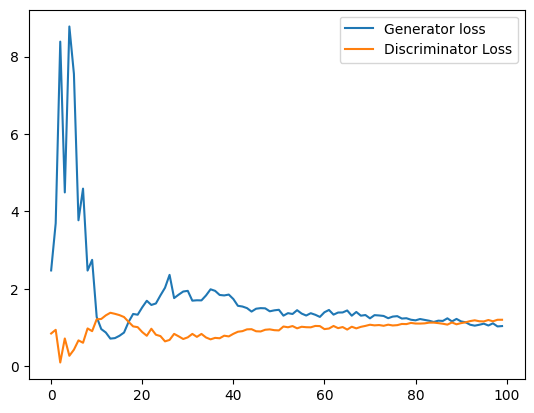

In [61]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')